<a href="https://colab.research.google.com/github/msuraj248/DeepLearning/blob/master/DNNClassifier-contrib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
import pandas as pd
data = pd.read_csv('bank_note_data.csv')
data.head(2)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [4]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [134]:
import tensorflow.compat.v1 as tf

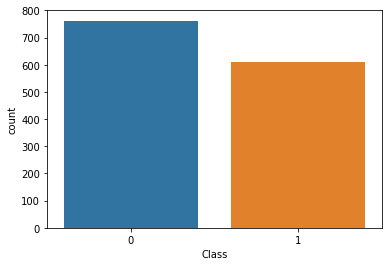

In [58]:
sns.countplot(data=data,x="Class")

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
x = data.drop("Class",axis=1)
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_fea = scaler.fit_transform(x)

In [8]:
df_1=pd.DataFrame(scaled_fea,columns=data.columns[:-1])
df_1.head(2)

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767


In [9]:
X=df_1
y = data['Class']

In [10]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
import tensorflow as tf
import tensorflow.contrib.learn as learn

In [ ]:
pip install tensorflow==1.15

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10, 20, 10], n_classes=2)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3b2e5eebe0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoint

In [85]:
sess = tf.compat.v1.Session()

In [ ]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

In [14]:
note_predictions = list(classifier.predict(X_test))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpf8x87mmf/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,note_predictions))

[[236   0]
 [  0 176]]


In [18]:
print(classification_report(y_test,note_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      1.00      1.00       176

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [20]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
rfc_preds = rfc.predict(X_test)
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       236
           1       0.99      0.98      0.99       176

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [22]:
print(confusion_matrix(y_test,rfc_preds))

[[234   2]
 [  3 173]]
